# Libraries Loading

In [1]:
from utils import dataHandlingUtils as dU

In [2]:
import os
import torchaudio
import torch

# Data Preprocessing

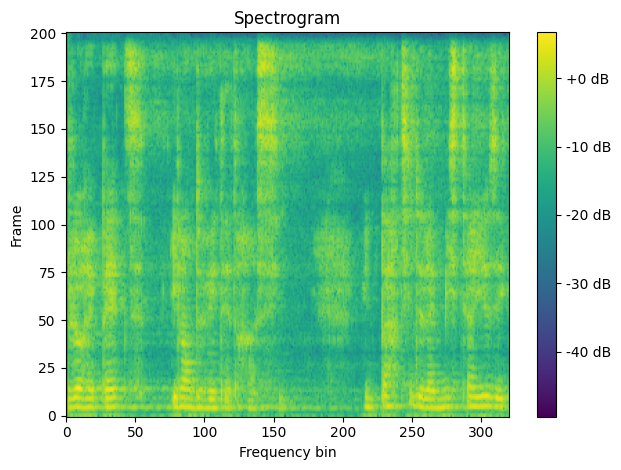

Sample Rate: 16000
Files in folder: 60
All audio files have the same sample rate: 16000


In [4]:
audio_file = "clean/clean_fileid_45.wav" 
folder_path = "clean"

waveform,sample_rate = dU.load(audio_file)
dU.plot_spectrogram(waveform, sample_rate)

print("Sample Rate:", dU.get_sample_rate(audio_file))
print("Files in folder:", dU.count_files_in_folder(folder_path))

is_audio, common_sample_rate = dU.check_sample_rate_consistency(folder_path)
if is_audio:
    print("All audio files have the same sample rate:", common_sample_rate)
else:
    print("Audio files have different sample rates.")


In [5]:
dU.play_audio(waveform, sample_rate)

In [6]:
# Get sample rate
print("Sample rate:", dU.get_sample_rate(audio_file))

Sample rate: 16000


In [7]:
BATCH_SIZE = 32

mixed_dir = "/kaggle/working/train/mix_both"
clean_dir = "/kaggle/working/train/mix_both"

dataset = AudioDataset(mixed_dir, clean_dir)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/train/mix_both'